In [1]:
import kagglehub
redwankarimsony_auto_insurance_in_sweden_path = kagglehub.dataset_download('redwankarimsony/auto-insurance-in-sweden')

print('Data source import complete.')

Data source import complete.


---

Este é um tutorial muito simples, destinado a iniciantes para entender e implementar a Regressão Linear Simples do zero.

<font color='blue'> Regressão Linear Simples </font> é um ótimo primeiro algoritmo de aprendizado de máquina para implementar, pois requer que você estime propriedades do seu conjunto de dados de treinamento, mas é simples o suficiente para iniciantes entenderem. A regressão linear é um método de previsão com mais de 200 anos. Neste tutorial, você descobrirá como implementar o algoritmo de regressão linear simples do zero em Python.

Depois de concluir este tutorial, você saberá:<br>
&#9632; Como estimar estatísticas a partir de dados de treinamento.<br>
&#9632; Como estimar coeficientes de regressão linear a partir de dados.<br>
&#9632; Como fazer previsões usando regressão linear para novos dados.<br>

A regressão linear pressupõe uma **relação linear ou de linha reta entre as variáveis ​​de entrada (X) e a variável de saída única (y).** Mais especificamente, essa saída (y) pode ser calculada a partir de uma combinação linear das variáveis ​​de entrada (X). Quando há uma única variável de entrada, o método é chamado de regressão linear simples.

Na regressão linear simples, podemos usar estatísticas nos dados de treinamento para estimar os coeficientes exigidos pelo modelo para fazer previsões em novos dados.

A linha para um modelo de regressão linear simples pode ser escrita como:

$$ y = b_0 + b_1 * x $$
onde $b_0$ e $b_1$ são os coeficientes que devemos estimar a partir dos dados de treinamento. Uma vez que os coeficientes são conhecidos, podemos usar esta equação para estimar valores de saída para $y$ dados novos exemplos de entrada de $x$. Ela requer que você calcule propriedades estatísticas a partir dos dados, como **média, variância** e **covariância.**

## <font color = 'blue'> Conjunto de dados de seguros suecos</font>
Usaremos um conjunto de dados real para demonstrar a regressão linear simples. O conjunto de dados é chamado de conjunto de dados **“Seguro de automóveis na Suécia”** e envolve **<font color='blue'> prever o pagamento total de todas as reivindicações em milhares de coroas suecas (y), dado o número total de reivindicações (x). </font>**

Isso significa que, para um novo número de reivindicações (x), seremos capazes de prever o pagamento total de reivindicações (y).

Vamos carregar algumas bibliotecas básicas do Python que precisaremos ao longo deste tutorial.

In [105]:
# library for manipulating the csv data
import pandas as pd

# library for scientific calculations on numbers + linear algebra
import numpy as np
import math

# # library for regular plot visualizations
import matplotlib.pyplot as plt

# #library for responsive visualizations
import plotly.express as px

## library for visualizations
import plotly.graph_objects as go


In [3]:
data = pd.read_csv(redwankarimsony_auto_insurance_in_sweden_path + "/swedish_insurance.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       63 non-null     int64  
 1   Y       63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [4]:
print(data.columns)
data.head(10)

Index(['X', 'Y'], dtype='object')


,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
5,57,170.9
6,23,56.9
7,14,77.5
8,45,214.0
9,10,65.3


Vamos dar uma olhada nos dados em si. Você pode usar matplotlib.pyplot ou plotly para visualização.

### Plot a distribuição da coluna X usando o box plot da lib plotly

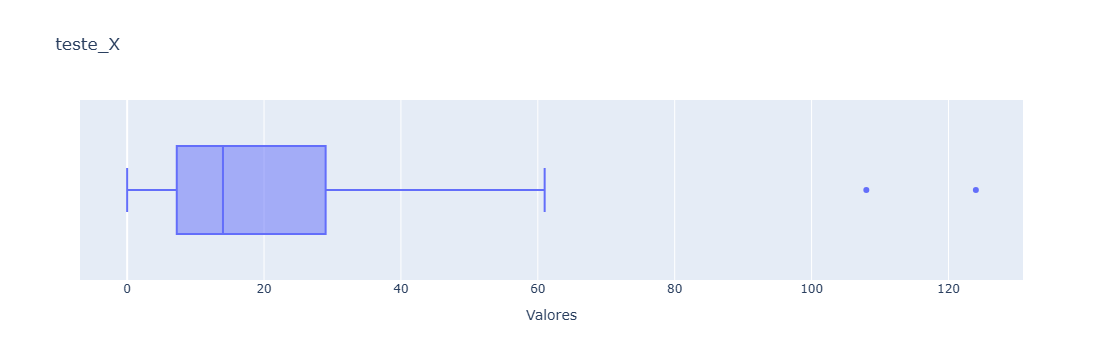

In [10]:
plot_x = px.box(data, x ="X", title="teste_X", labels={"X": "Valores"})
plot_x.show()

### Plot a distribuição da coluna Y usando o box plot da lib plotly

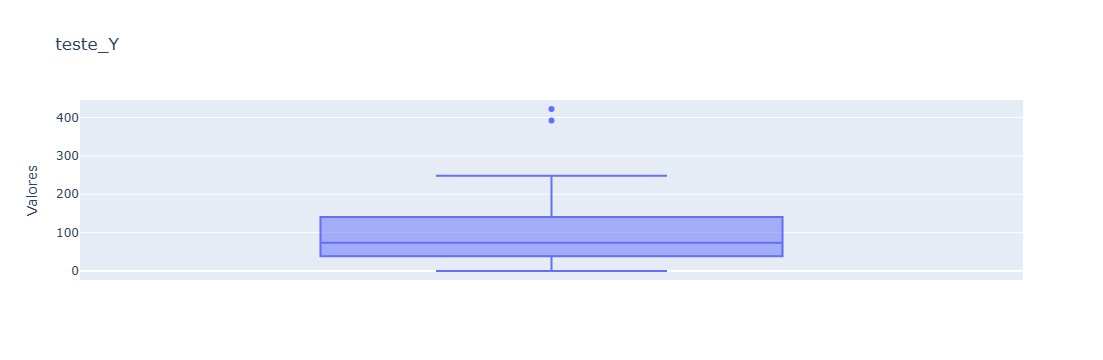

In [8]:
plot_y = px.box(data, y ="Y", title="teste_Y", labels={"Y": "Valores"})
plot_y.show()

### Faça o plot da dispersão entre a variável X e Y para verificar o relacionamento entre variável independente e variável dependente (continue utilizando a lib plotly)

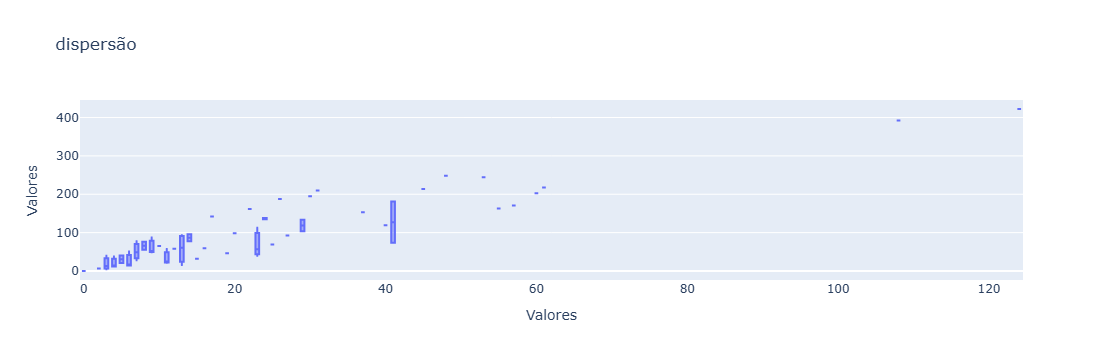

In [14]:
plot_dispersao = px.box(data, x="X", y="Y", title = "dispersão", labels={"X": "Valores", "Y": "Valores"})
plot_dispersao.show()

## Este treinamento é dividido em cinco partes:
* Calcular média e variância.
* Calcular covariância (X,Y).
* Estimar coeficientes.
* Fazer previsões.
* Comparação visual para correção.

Essas etapas darão a você a base necessária para implementar e treinar modelos de regressão linear simples para seus próprios problemas de previsão.

### 1. Calcular Média e Variância.
Como dito anteriormente, a regressão linear simples usa média e variância dos dados fornecidos. Usaremos as funções internas `numpy` para calculá-las.

In [53]:
# Faça o cálculo da np.meanmédia e variância para as variáveis X e Y aqui.
x_to_numpy = data["X"].to_numpy()
media_x = np.mean(x_to_numpy)
var_x = np.var(x_to_numpy)

y_to_numpy = data["Y"].to_numpy()
media_y = np.mean(y_to_numpy)
var_y = np.var(y_to_numpy)

print(f"Média_X: {media_x}")
print(f"Variância_X: {var_x}")
print(f"Média_Y: {media_y}")
print(f"Variância_Y: {var_y}")

Média_X: 22.904761904761905
Variância_X: 536.657596371882
Média_Y: 98.18730158730159
Variância_Y: 7505.052219702695


### 2. Calcule a covariância.
A covariância de dois grupos descreve como esses grupos mudam juntos. A covariância é uma generalização da correlação. A correlação descreve a relação entre dois grupos de dados, enquanto a covariância pode descrever a relação entre dois ou mais grupos de dados. Ela é calculada pela seguinte fórmula.
$$ Cov(X,Y) = \frac{\sum{(X_i - \overline{X})}{(Y_j - \overline{Y})}}{n} $$

In [66]:
# Faça o cálculo da covariância entre X e Y aqui.
n = len(x_to_numpy)
covariancia_manual = np.sum(((x_to_numpy - media_x) * (y_to_numpy - media_y)))/n
print(F"Covariância manual: {covariancia_manual}")

##para conferência
covariancia_funcao = np.cov(x_to_numpy, y_to_numpy, ddof = 0)
teste_matrix = teste_funcao[0,1]
print(F"Covariância função: {teste_matrix}")

Covariância manual: 1832.054346182918
Covariância função: 1832.0543461829184


### 3. Estimar coeficientes
Agora que temos todas as variáveis necessárias para calcular os coeficientes (parâmetros) de uma regressão linear simples, vamos em frente para estimar esses parâmetros (b1 e b0);

### Fórmulas para os parâmetros da regressão linear simples

1. **Cálculo do coeficiente angular $b_1$:**

$$
b_1 = \frac{\sum{(x_i - \overline{x})(y_i - \overline{y})}}{\sum{(x_i - \overline{x})^2}}
$$

ou, equivalente:

$$
b_1 = \frac{Cov(X, Y)}{Var(X)}
$$

2. **Cálculo do intercepto $b_0$:**

$$
b_0 = \overline{y} - b_1 \cdot \overline{x}
$$

### Onde:
- $x_i$: valores da variável independente $x$,
- $y_i$: valores da variável dependente $y$,
- $\overline{x}$: média dos valores de $x$,
- $\overline{y}$: média dos valores de $y$,
- $Cov(X, Y)$: covariância entre $X$ e $Y$,
  - $$ Cov(X,Y) = \frac{\sum{(x_i - \overline{x})(y_i - \overline{y})}}{n} $$
- $Var(X)$: variância de $X$,
  - $$ Var(X) = \frac{\sum{(x_i - \overline{x})^2}}{n} $$


In [79]:
# Estime os valores para os parâmetros b1 e b0 aqui com base nas estatísticas calculadas anteriormente
coeficiente_angular = sum((x_to_numpy - media_x) * (y_to_numpy - media_y)) / sum((x_to_numpy - media_x)**2)
print(F"Coeficiênte angular : {coeficiente_angular}")

coeficiente_intercepto = media_y - coeficiente_angular * media_x
print(F"Coeficiênte intercepto : {coeficiente_intercepto}")


Coeficiênte angular : 3.4138235600663664
Coeficiênte intercepto : 19.99448575911481


### 4. Faça previsões
O modelo de regressão linear simples é uma reta definida por coeficientes estimados a partir de dados de treinamento. Uma vez que os coeficientes são estimados, podemos usá-los para fazer previsões. A equação para fazer previsões com um modelo de regressão linear simples é a seguinte:
$$ \hat{y} = b_0 + b_1 * x $$

In [94]:
# Calcule as predições aqui com base na variável X do nosso conjunto de dados.
predicoes = coeficiente_intercepto + coeficiente_angular * x_to_numpy
print(predicoes)

[388.68743025  84.8571334   64.37419204 443.30860721 156.54742816
 214.58242868  98.51242764  67.7880156  173.61654596  54.13272136
  37.06360356 183.85801664  57.54654492  98.51242764  43.89125068
  26.82213288 101.9262512   40.47742712  30.23595644  98.51242764
  40.47742712  50.7188978   50.7188978   30.23595644 118.995369
  43.89125068  33.64978     88.27095696  43.89125068  33.64978
  19.99448576 105.34007476  40.47742712  37.06360356  95.09860408
  57.54654492 228.23772292  60.96036848  33.64978     74.61566272
  64.37419204 224.82389936 159.96125172 146.30595748 207.75478156
 159.96125172  57.54654492 112.16772188  47.30507424  30.23595644
  78.02948628  64.37419204  64.37419204  71.20183916  47.30507424
 118.995369   122.40919256 101.9262512   50.7188978  125.82301612
  67.7880156  200.92713444 108.75389832]


### 5. Visualizando as predições como uma regressão linear

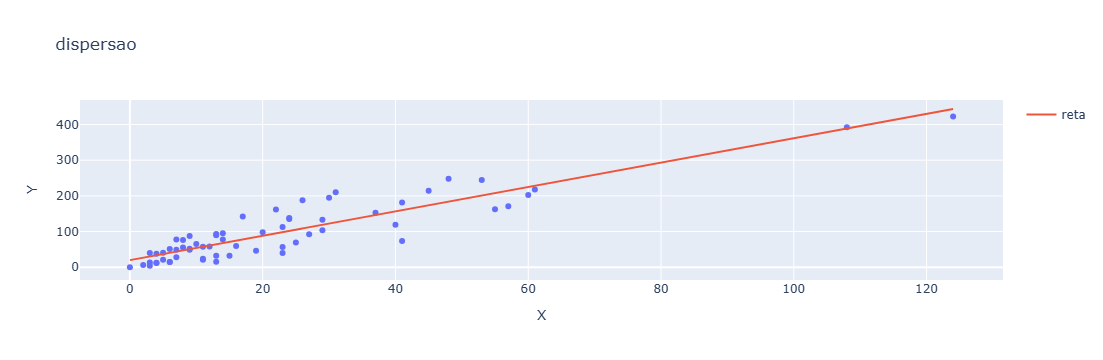

In [107]:
# Plot a regressão linear estimada aqui usando o plotly
grafico = px.scatter(x = x_to_numpy, y = y_to_numpy, labels={'x': 'X', 'y': 'Y'}, title="dispersao")
grafico.add_trace(go.Scatter(x = x_to_numpy, y = predicoes, mode = "lines", name = "reta"))
grafico.show()

## Para onde ir a partir daqui (extra)
* <font color="red">Você consegue descobrir precisão das previsões (RMSE e MSE)???</font>
* Estender o mesmo problema para vários recursos de entrada.